# Date Matcher

A model trained on data set of Speed Dating which determines how likely a person will get matched and would obtain a date based on his or her attributes for example likes, tags, previous matches, intrests, user cluster. 

A data set is been trained on following models which are as follows
**_Self Made Neural Network
**_Tensorflow Deep Neural Network 
**_Support Vector Machine 
**_Logistic Regression

In [1]:
# tensorflow import
import tensorflow as tf 

# sklearn imports 
from sklearn.model_selection import train_test_split # to split our data set 
from sklearn.preprocessing import StandardScaler # to standardize our features 
from sklearn.decomposition import PCA # dim reduction 
from sklearn.metrics import accuracy_score, confusion_matrix # to determine accuracy of our classifier 
from sklearn.svm import SVC # Support Vector classifier 
from sklearn.linear_model import  LogisticRegression # logistic regressor classifier 


# helper libraries
import numpy as np # matrix maths 
import pandas as pd # data into tabular form 

# to viz our model 
import matplotlib.pyplot as plt # plot our model 

In [2]:
# loading our data set 
data = pd.read_csv('./dataset/DatingData.csv', encoding='latin1')

In [3]:
# extracting label field 
label = data[['match']]

# extracting features df 
features = data.drop(['match'], axis=1)

##  1. Cleaning of our data set 

In [4]:
# get number of fields with na 
na_sum = features.isnull().sum()
print("Number of columns with null values are",len(na_sum))
na_col = list(features.isnull().columns)
print(len(na_col))

Number of columns with null values are 194
194


In [5]:
# droping columns of null value for more than 30% of data set 

drop_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 2523:
        drop_col.append(na_col[i])
print("We can drop ",len(drop_col)," Columns")

We can drop  83  Columns


In [6]:
# dropping na columns
features.drop(drop_col, axis=1, inplace=True)
features.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [7]:
features.shape

(8378, 111)

In [8]:
# filling our data set with mean values 
features.fillna(features.mean(), inplace=True)
features.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,9.295775,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,9.295775,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,9.295775,10,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,9.295775,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,9.295775,7,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [9]:
# getting if there are still some na values 
features.isnull().sum().any()

True

In [10]:
# lets compute if there are any more na values 
na_sum = features.isnull().sum()
na_cols = list(features.isnull().columns)

nan_cols = []

for i in range(len(na_sum)):
    if (na_sum[i] > 0):
        nan_cols.append(na_cols[i])
nan_cols

['field', 'from', 'zipcode', 'career']

In [11]:
# getting insights of these columns 
features[['field', 'from', 'zipcode', 'career']].head()

,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer


In [12]:
# these are of no use 
features.drop(nan_cols, axis=1, inplace=True)
features.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,9.295775,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,9.295775,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,9.295775,10,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,9.295775,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,9.295775,7,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [13]:
# Converting data into scalar 

scaled_features = StandardScaler().fit_transform(features)
# scaled features
scaled_features

array([[-1.78261324, -1.44977617, -1.00119432, ..., -0.21448425,
        -0.4121308 , -0.90300716],
       [-1.78261324, -1.44977617, -1.00119432, ..., -0.21448425,
        -0.4121308 , -0.90300716],
       [-1.78261324, -1.44977617, -1.00119432, ..., -0.21448425,
        -0.4121308 , -0.90300716],
       ...,
       [ 1.69210734,  2.3748909 ,  0.99880711, ..., -1.1122386 ,
        -1.09653939,  0.91903928],
       [ 1.69210734,  2.3748909 ,  0.99880711, ..., -1.1122386 ,
        -1.09653939,  0.91903928],
       [ 1.69210734,  0.        ,  0.99880711, ..., -1.1122386 ,
        -1.09653939,  0.91903928]])

In [14]:
# Reducing features using pca 
# making a pca object 
pca = PCA()

# pca transformation
pca.fit_transform(scaled_features)

array([[-1.12790287e-01,  4.38938815e-01, -3.99012172e+00, ...,
        -6.32798433e-02,  1.09177483e-02, -7.60238297e-03],
       [-4.60848222e-01,  1.79020036e-01, -3.58831054e+00, ...,
        -4.75206031e-02,  1.05095310e-02, -2.35005837e-02],
       [-2.61677978e+00,  2.52342679e+00, -5.04277640e+00, ...,
        -4.30657898e-02,  1.06426118e-02, -1.69436445e-02],
       ...,
       [ 4.29349423e+00,  3.11397980e+00,  8.86818050e+00, ...,
        -1.19939561e-02, -7.68827534e-03, -3.67453524e-03],
       [ 3.06349116e+00,  4.87790151e+00,  7.91930293e+00, ...,
        -1.95773050e-02, -1.51964558e-02, -6.91227960e-03],
       [ 1.87201356e+00,  5.70640368e+00,  7.50899180e+00, ...,
        -2.28685699e-01,  1.62958477e+00,  1.72556435e-01]])

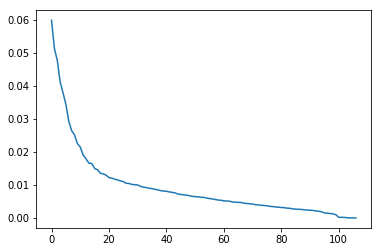

In [15]:
# plotting elbow curve for better feature selection 
plt.plot(pca.explained_variance_ratio_)
plt.show()

Hence we can see that best fit for our features is 80 components and thet retain maximum information, so making a pca using just 80 features:

In [16]:
# making a revised pca 
pca = PCA(n_components=80)
reduced_features =  pca.fit_transform(scaled_features) # reduced features

In [17]:
# splitting our data set into train test case 
X_train,X_test, y_train, y_test = train_test_split(reduced_features, label, random_state=0, test_size=0.25)

In [18]:
# importing self made neural network 
from neural_network import NeuralNetwork

# making a neural network object 
nn = NeuralNetwork(input_layer=reduced_features.shape[1], output_layer=1)

# train neural network 
nn.train(X_train, y_train, num_iterations=100)

In [19]:
# predicting our model 
ypred = nn.predict(X_test)
ypred = np.where(ypred >= 0.5, 1,0)
print("Accuracy score {}".format(accuracy_score(y_test, ypred)))
confusion_matrix(y_pred=ypred, y_true=y_test)

Accuracy score 0.8281622911694511


array([[1735,    0],
       [ 360,    0]])

## Using TF for prediction

In [20]:
# making feature columns 
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

# making a DNNC of 40 units of hidden layer 
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[40], n_classes=2)

# fit and predict our values 
classifier.fit(X_train, y_train, steps=300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score = accuracy_score(y_test, predictions)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fdd83fafeb8>, '_master': '',

INFO:tensorflow:Saving checkpoints for 300 into /tmp/tmpny9mepbo/model.ckpt.
INFO:tensorflow:Loss for final step: 0.032996017.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpny9mepbo/model.ckpt-300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [21]:
print("Accuracy Score ",score)

Accuracy Score  0.99618138424821


## Using SVM 

In [22]:
# loading svm 
from sklearn.svm import SVC

svc = SVC()

# fitting our model
svc.fit(X_train, y_train)

/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# predicting score of our model 
print("Accuracy Score is {}".format(svc.score(X_test, y_test)))

Accuracy Score is 0.9937947494033413


## Using Logistic Regressor 

In [24]:
# import logistic regressor 
from sklearn.linear_model import LogisticRegression

# making a LR obj 
lr = LogisticRegression()

lr.fit(X_train, y_train)

/home/sanidhya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
# score of LR 
print("Accuracy score of Logistic Regressor is : {}".format(lr.score(X_test, y_test)))

Accuracy score of Logistic Regressor is : 1.0
